<a href="https://colab.research.google.com/github/carsonljc/APS360-Project/blob/master/Detector/Train_YoloV3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Aug  2 20:21:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#SOFT LINK IS IMPORTANT! If soft link fails the model will not save
#Reserve a directory for YOLO
!ln -s /content/drive/'My Drive'/APS360/yolov3/ /mydrive

#!google-drive-ocamlfuse -cc


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls /mydrive

 Datasets   Model_States  'Train_YoloV3 .ipynb'


In [ ]:
#Can I copy your homework?
#Yeah, but just changed it up a bit so it doesn't look like you copied
#Ok 
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14135 (delta 3), reused 10 (delta 3), pack-reused 14118
Receiving objects: 100% (14135/14135), 12.77 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (9604/9604), done.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
# change makefile to have GPU and OPENCV enabled

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
#Download and Upload this file to edit
#Contains hyperparameters
#download('cfg/yolov3_training.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%cd cfg/
upload()
%cd ..

[Errno 2] No such file or directory: 'cfg/'
/content/darknet/cfg


Saving yolov3_training.cfg to yolov3_training.cfg
saved file yolov3_training.cfg
/content/darknet


In [ ]:
!echo "street sign" > data/obj.names

#MAKE SURE BACKUP IS CONFIGURED CORRECTLY
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/Model_States/Save_3' > data/obj.data
!rm data/obj
!mkdir data/obj

rm: cannot remove 'data/obj': No such file or directory


In [ ]:
#Download and edit this file to edit
#Contains data info (i.e. classes, paths, etc.)
#download('data/obj.data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-07-27 16:54:27--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   363KB/s    in 6m 53s  

2020-07-27 17:01:22 (384 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip -q /mydrive/Datasets/hand_selected_416x416/train.zip -d data/obj


In [ ]:

!unzip -q /mydrive/Datasets/hand_selected_416x416/val.zip -d data/obj

In [ ]:
!unzip -q /mydrive/Datasets/hand_selected_416x416/test.zip -d data/obj

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

def clean_txt_files (txt_file_paths): 
  for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            #print(line)
            numbers = re.findall("[0-9.]+", line)
            #print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(numbers[0], numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                #print(i, file_path)
                #print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

In [ ]:
txt_file_paths = glob.glob(r"data/obj/train/*.txt")
clean_txt_files(txt_file_paths)


In [ ]:
txt_file_paths = glob.glob(r"data/obj/val/*.txt")
clean_txt_files(txt_file_paths)

In [ ]:
txt_file_paths = glob.glob(r"data/obj/test/*.txt")
clean_txt_files(txt_file_paths)

In [ ]:
import glob
images_list = glob.glob("data/obj/train/*.jpg")
print(images_list)

['data/obj/train/-gV4nG-7GAoQOLfuxidvEw-4.jpg', 'data/obj/train/7rfK5SbjVwo1xHFqg-OBhw-0.jpg', 'data/obj/train/spofhRdXS7ikWbtRX1r-fg-1.jpg', 'data/obj/train/FM9XS3ceHVRijkyqasHO_Q-2.jpg', 'data/obj/train/7WNzJ_kba9gj5ZvZty4onw-3.jpg', 'data/obj/train/63Ee7aC6ikYOMFNeupa0Rw-1.jpg', 'data/obj/train/bos5rZzt_0FqY5KZ5Nn8iQ-2.jpg', 'data/obj/train/IGtyDSmhrsv0uzMWSE3nNQ-5.jpg', 'data/obj/train/Ds7wq4iLVzK-c8buW2gnFg-0.jpg', 'data/obj/train/GLQeOvqZyC0rH1Hglh-XXw-2.jpg', 'data/obj/train/aGUYJTsh-nZHySjj4lK5IA-3.jpg', 'data/obj/train/Hc5zlYDUve6-4s8kutCIWA-2.jpg', 'data/obj/train/2fk5R5oPO7nUsYNuZPAB_A-0.jpg', 'data/obj/train/TKN8_-uaJ14dhavKmu0OmQ-5.jpg', 'data/obj/train/8cbd5v9AvrYnXWY8RYNDkg-0.jpg', 'data/obj/train/6Ng0_78WfLz8-dgyGyp6wA-1.jpg', 'data/obj/train/varTNZ2kA1P7aehr-peUZw-0.jpg', 'data/obj/train/xKWCf-kSmpUMRDxRuSgCug-2.jpg', 'data/obj/train/2_b2-C6hJtnQwJUF7zP0TQ-1.jpg', 'data/obj/train/EnhJwUZu4s76FADbs0rGmw-1.jpg', 'data/obj/train/PGwbVfnpeE8_e6gm32kflQ-2.jpg', 'data/obj/tr

In [ ]:
print (len(images_list))

30820


In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

In [ ]:
import glob
images_list = glob.glob("data/obj/val/*.jpg")
print(images_list)

['data/obj/val/_11AtPZo5tz3rgDEtduDOA-3.jpg', 'data/obj/val/x9_ugKzSbMzcpwmazn6wIg-4.jpg', 'data/obj/val/MPm_6-Y6v9fPc8tfL3qruw-1.jpg', 'data/obj/val/RiMAXrYFhya2YaOgu19AdA-1.jpg', 'data/obj/val/A_WIefuc2WBHEWTxabLOnQ-0.jpg', 'data/obj/val/BGpbm2N0oa3SaaDx_4ZMOA-5.jpg', 'data/obj/val/LTGUyMI0DKfHKLDU1jgcsA-5.jpg', 'data/obj/val/bL2ZokU0GQHb8DRaD_IYXA-3.jpg', 'data/obj/val/gKb-g16I9KWzYiEbPcZAEg-2.jpg', 'data/obj/val/4kjmS3PaFt0FkTtPEiKRXA-1.jpg', 'data/obj/val/j041fphyoN8d-q97LLHtgA-0.jpg', 'data/obj/val/Famu6ETTaBJbDh6E7ih18Q-2.jpg', 'data/obj/val/DWSHWbqV3icSnUKPaYMYxQ-0.jpg', 'data/obj/val/Adwgm1bY3B--_8B3xfVlYQ-0.jpg', 'data/obj/val/h1NKPIL1mzDL2UniVoCRkA-1.jpg', 'data/obj/val/y_4K7mKb5BDeAwyf7lu5DA-0.jpg', 'data/obj/val/7l_YxVRT3q4qGbByFTwCJA-1.jpg', 'data/obj/val/IVmc2X0mRsRTBtu4fp2iTQ-3.jpg', 'data/obj/val/aPMNho8skxl5Sq5HWZyogQ-1.jpg', 'data/obj/val/6HBdjjjBPAmOMplYn8cbBA-7.jpg', 'data/obj/val/n_k1LMmEscigx1Z_UL7nVw-2.jpg', 'data/obj/val/i59PLDky7fJyJWK1E2vV2g-1.jpg', 'data/obj

In [ ]:
import glob
images_list = glob.glob("data/obj/val/*.jpg")
print(images_list)

['data/obj/test/oGQySIl_dJJtOpDGceFkPQ-0.jpg', 'data/obj/test/r3gFX7oV1KXvIL4n8ZqcVQ-2.jpg', 'data/obj/test/vt1QGKF-Y7e65ktoH-lSRA-0.jpg', 'data/obj/test/KOli59IKnOoinHD5sx-CIg-2.jpg', 'data/obj/test/sMQvzpIwsRFIiTXZ4U1ioA-2.jpg', 'data/obj/test/Me8pDx3jZFZOVlkFbamrDg-4.jpg', 'data/obj/test/evi-fy7YVXnjuWmAzRZ3ZA-0.jpg', 'data/obj/test/MknHsLQTKB_MHGLYHsLmWQ-0.jpg', 'data/obj/test/YDxGXMauO6U17wnx2G0EWg-4.jpg', 'data/obj/test/SIvffxKhpoR8mdIg55FRQQ-2.jpg', 'data/obj/test/ZSvU1zC6KArG6D4o2yMNIA-0.jpg', 'data/obj/test/iCcdhLbKw_xH70ph2lw14Q-1.jpg', 'data/obj/test/R_V_ysXl0Z9Zg7xnjFaUPQ-1.jpg', 'data/obj/test/Jafpnl788Wd1D-z4XHg-QA-3.jpg', 'data/obj/test/DY5Qg2N2AcKfdCR7epJmrQ-0.jpg', 'data/obj/test/HRiRPi_DDRbE_gYXPKF0Qw-0.jpg', 'data/obj/test/b1aB_r3hq4PVtbjQeBVvKA-1.jpg', 'data/obj/test/8aWmikZc5hmsEelT2AlDgg-0.jpg', 'data/obj/test/1D_sOxb3s586nnPPVwJifQ-13.jpg', 'data/obj/test/o4oHcSAzRlEjc_5X8DhmAQ-1.jpg', 'data/obj/test/JH4O_PY64wJnwimnOdjC2Q-0.jpg', 'data/obj/test/SKcW2OTDpm9U65oPb

In [ ]:
#Create test.txt file
#test.txt is a misnomer - actually validation
#If you run any of the validation commands, it will use this file
file = open("data/test.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

In [ ]:
#Calc anchors
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 416 -height 416

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 416, height = 416 
 read labels from 30820 images 
 loaded 	 image: 30820 	 box: 36249
 all loaded. 

 calculating k-means++ ...

 iterations = 111 


counters_per_class = 36249

 avg IoU = 76.57 % 

Saving anchors to the file: anchors.txt 
anchors =  15, 16,  12, 29,  22, 24,  35, 16,  32, 37,  49, 49,  66, 76, 102,106, 162,173
^C


**6) Start the training**

In [ ]:
#Set up server for loss graph

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 8090 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
 "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-07-24 22:04:56--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.22.53.129, 52.5.250.138, 54.84.89.161, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.22.53.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  12.8MB/s    in 1.0s    

2020-07-24 22:04:57 (12.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://7c34a3b85dfe.ngrok.io


In [ ]:
# Start the training 
#Only use darknet53.conv.74 when training for the first time
#If training gets disrupted you can replace darknet53.conv.74 with the path to the weights you saved

!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -map 0.001 

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/Model_States/Save_3/yolov3_training_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.839878, GIOU: 0.832911), Class: 0.999794, Obj: 0.990699, No Obj: 0.000143, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.019120, iou_loss = 0.016955, total_loss = 0.036075 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000006, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.004146, iou_loss = 0.000000, total_loss = 0.004146 
 total_bbox = 55530, rewritten_bbox = 0.018008 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000153, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.865467, GIOU: 0.862854), Class: 0.999911, Obj: 0.884348, No Obj: 

In [ ]:
#In case you used "run_all", collab will stop here
assert False

In [ ]:
#Show training curve
imShow('chart.png')

In [ ]:
#download('chart.png')

In [ ]:
#save training curve somewhere - I recommend doing this
!cp chart.png /mydrive/chart.png

In [ ]:
#mAP will show some statistics about the TESTING set - not that useful imo
!./darknet detector map data/obj.data cfg/yolov3_training.cfg  /mydrive/Model_States/Save_3/yolov3_training_6000.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

In [ ]:
#valid will generate the predicted bonunding boxes and save them to a textfile
#Use textfile to comp acc?
!./darknet detector valid data/obj.data cfg/yolov3_training.cfg  /mydrive/yolov3_training_last.weights -dont_show -thresh 0.3

^C


In [ ]:
#download("results/comp4_det_test_street sign.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Test will allow you to enter one file at a time for testing
!./darknet detector test data/obj.data cfg/yolov3_training.cfg  /mydrive/Weight_1/yolov3_training_last.weights -dont_show

^C


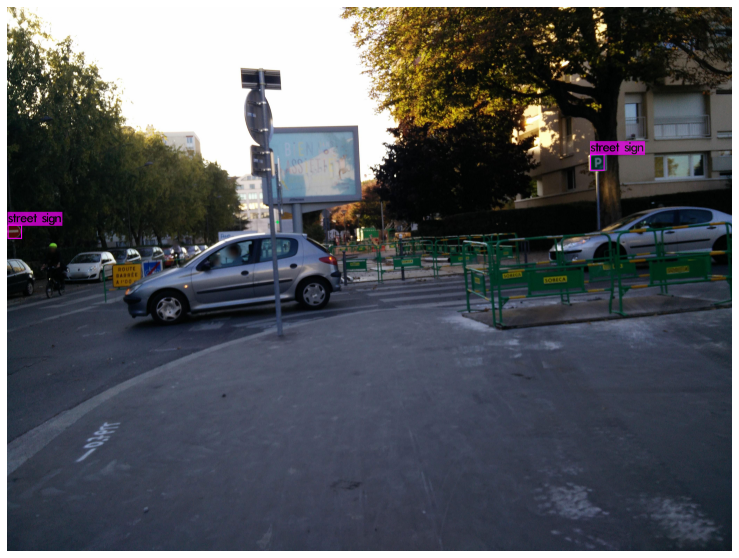

In [ ]:
#Use this command to show the LATEST prediction
imShow("predictions.jpg")